[![Open in Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nishani53/Khanal_MSc_Thesis_MSU/blob/main/Khanal_MSU_project_market_change_1980s-2020s/Khanal_MSU_project_market_coverage_change_1980s-2020s.ipynb)


**Prepared by Naresh Khanal**  
Forest Economics Lab, Michigan State University  
February 01, 2025  
Khanalna@msu.edu

# 🧭 Forest Market Footprint Change in Michigan (1980s–2020s)

This analysis evaluates **how the spatial extent of forest product markets has changed across Michigan** from the **1980s through 2023**. By combining mill procurement zones for all major forest products into **decade-wide market coverage maps**, and comparing those across time, this project identifies where markets were **retained**, **lost**, or **gained**.

---

## 📌 Objective

To understand long-term market trends by analyzing the **presence and shifts in overall procurement coverage**, rather than competition intensity.

---

## 🪵 Forest Products Included

- 🌳 Hardwood Sawlogs  
- 🌲 Softwood Sawlogs  
- 🧻 Pulpwood  
- 🔥 Wood Biomass  

Each product’s procurement zone (based on haul distance/time) was merged to form **comprehensive market coverage** per decade.

---

## 🔍 Key Spatial Categories

By comparing the combined market zones from earlier decades to 2023, we identify:

| Category | Description |
|----------|-------------|
| 🟩 **Market Retained** | Areas that were within market zones in previous decades and remained so in 2023. |
| 🟥 **Market Loss**     | Areas that were within historical market zones but are no longer served in 2023. |
| 🟦 **Market Gained**   | New areas included in the 2023 market zone that were not previously served. |

These categories help evaluate the **geographic stability, contraction, or expansion** of the industry over time.

---

## 🛠️ Methodology Summary

1. **Dissolve** all forest product zones per decade into a single market footprint.
2. **Overlay** historical and 2023 market polygons using spatial operations.
3. Classify areas into retained, lost, or gained categories.
4. Output maps for visualization and spatial analysis.

### Tools Used

- **Python**
- **GeoPandas**
- **Shapely**
- **Fiona**
- **Matplotlib**

---

## 🗂️ Time Periods Compared

Market changes were analyzed across the following decades:

- 📼 **1980s**
- 📀 **1990s**
- 💾 **2000s**
- 💻 **2010s**
- 📱 **2023 (Current)**

---

## 📈 Use Cases

- Identifying areas of long-term market resilience or decline  
- Planning outreach or investment in newly gained or underserved regions  
- Supporting infrastructure, forest access, and policy decisions  
- Understanding long-term forest industry dynamics in Michigan

---

## 📧 Contact

For access to maps, spatial datasets, or further collaboration:

**Naresh Khanal**  
✉️ [khanalna@msu.edu](mailto:khanalna@msu.edu)  
📍 Michigan State University

---

## 📎 License

This analysis is intended for **academic and research use only**.  
Please contact the author before redistribution or reuse.


**Download the necessary Libraries**

In [1]:
!pip install geopandas fiona
!pip install matplotlib-scalebar
!pip install gdown
!pip install pydrive
!pip install matplotlib-scalebar


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 51.0 MB/s eta 0:00:00


In [6]:
# Step 1: Clean up any previously unzipped folders or ZIPs
%cd /content
!rm -rf Khanal_MSc_Thesis_MSU-main repo.zip

# Step 2: Download the GitHub repository as a ZIP file
!curl -L -o repo.zip https://github.com/Nishani53/Khanal_MSc_Thesis_MSU/archive/refs/heads/main.zip
!unzip -q repo.zip

# Step 3: Navigate to the directory where the data ZIP is stored
%cd Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_market_change_1980s-2020s/Data

# Step 4: Unzip the Market Coverage Maps dataset
!unzip -q "MI Market Coverage Maps.zip"

# Step 5: Go back to the notebook directory or define the base path
%cd ..

# Step 6: Define base path for future use
import os

base_path = "Data/MI Market Coverage Maps"

def shp(filename):
    return os.path.join(base_path, filename)


/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 91.0M    0 91.0M    0     0  11.2M      0 --:--:--  0:00:08 --:--:-- 14.7M
/content/Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_market_change_1980s-2020s/Data
/content/Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_market_change_1980s-2020s


# Market change MAPS

# Change between 1985 and 2023

# Biomass

/tmp/ipython-input-7-3461985142.py:24: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-7-3461985142.py:25: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom85 = gpd.overlay(g85.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-7-3461985142.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-7-3461985142.py:67: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

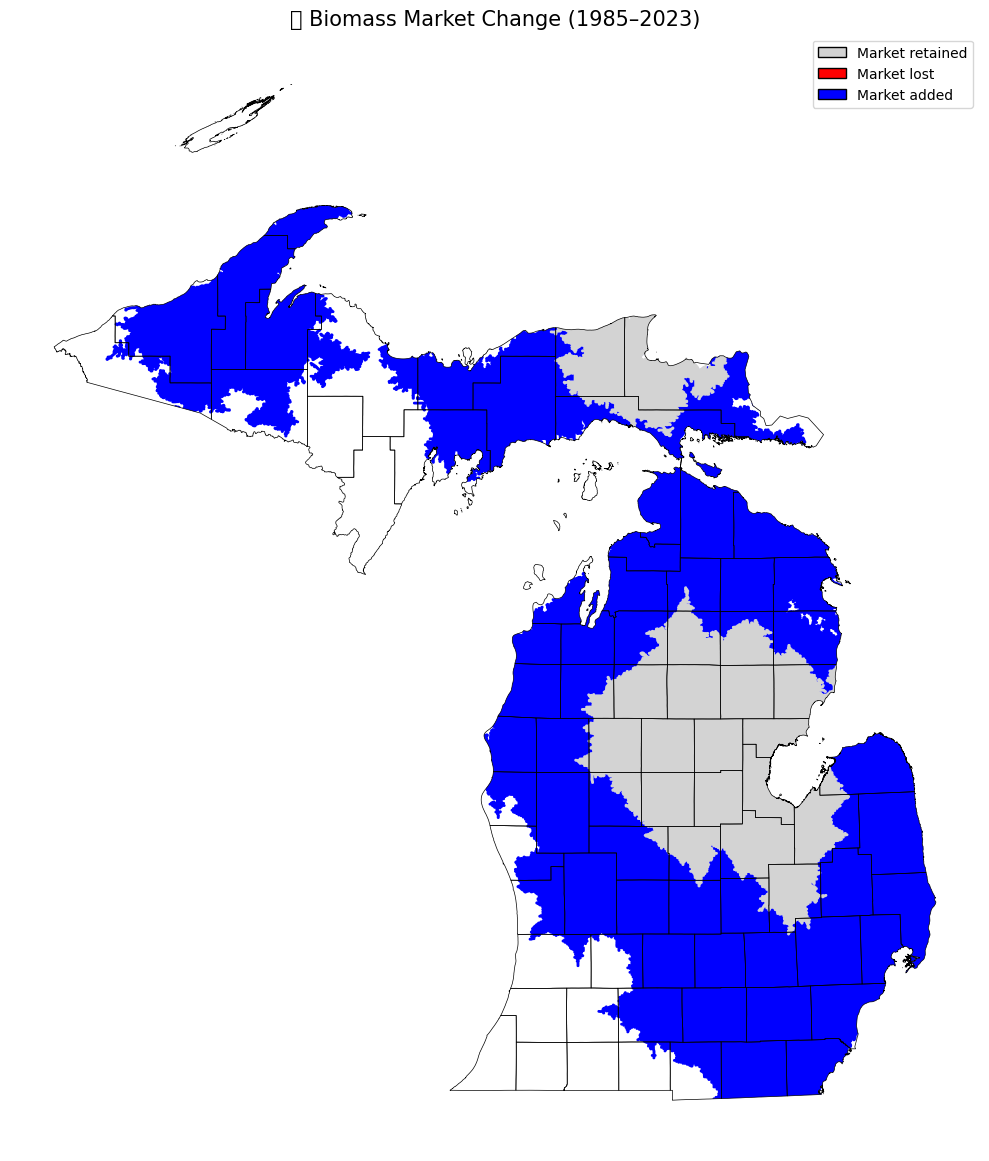

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os

# === File paths (use Colab-friendly helper) ===
michigan_path = shp("michigan_counties.shp")
path_1985 = shp("biomass_1985.shp")
path_2023 = shp("biomass_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g85 = gpd.read_file(path_1985)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g85 = g85.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom85 = gpd.overlay(g85.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom85.intersection(geom23)
lost_geom = geom85.difference(geom23)
added_geom = geom23.difference(geom85)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
retained = retained.buffer(0)
lost = lost.buffer(0)
added = added.buffer(0)

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)

retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

# === Legend styling
legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)

# === Title and appearance
ax.set_title("📉 Biomass Market Change (1985–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()


/tmp/ipython-input-8-3395070549.py:25: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-8-3395070549.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom94 = gpd.overlay(g94.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-8-3395070549.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-8-3395070549.py:68: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

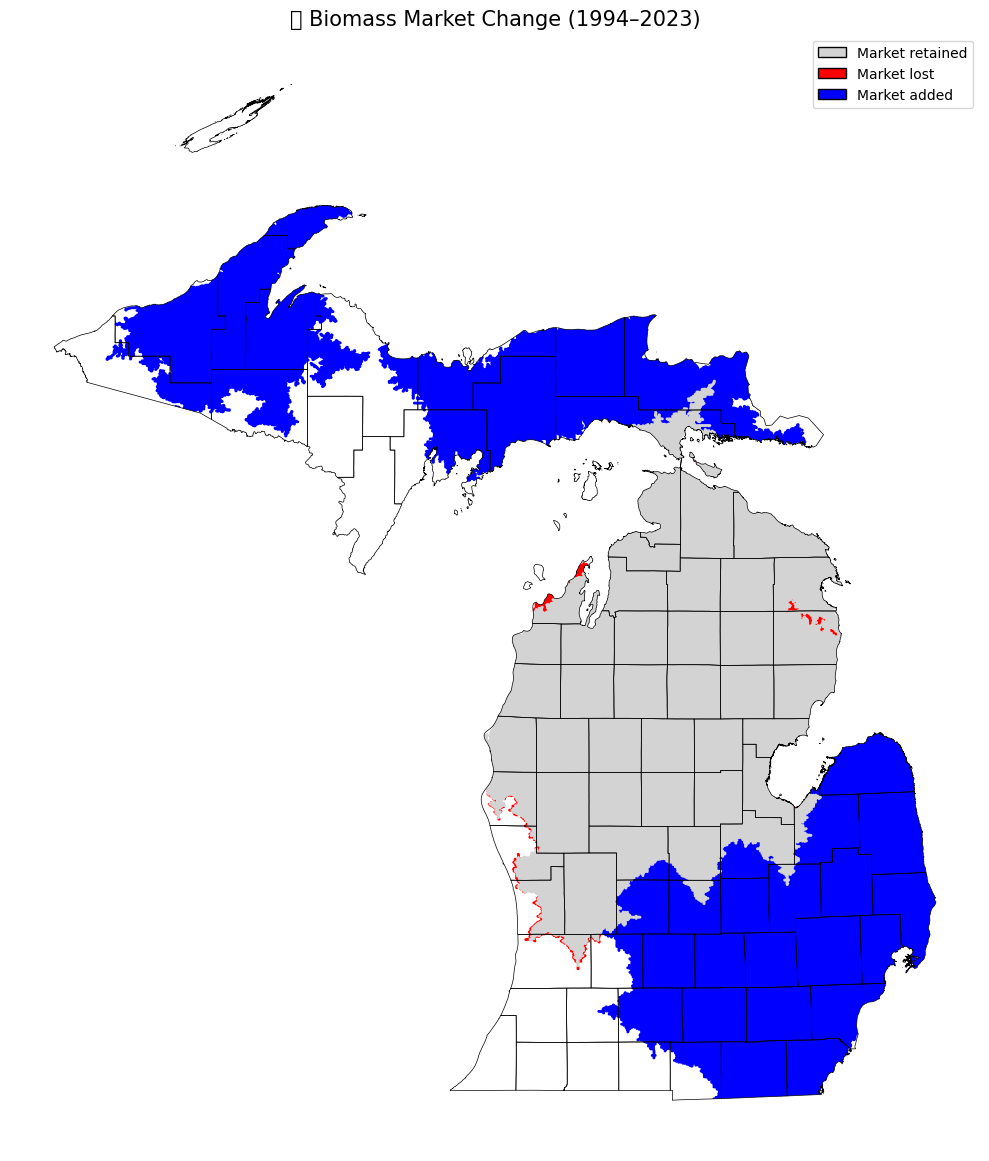

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os

# === File paths ===
michigan_path = shp("michigan_counties.shp")
path_1994 = shp("biomass_1994.shp")
path_2023 = shp("biomass_2023.shp")


# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g94 = gpd.read_file(path_1994)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g94 = g94.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom94 = gpd.overlay(g94.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom94.intersection(geom23)
lost_geom = geom94.difference(geom23)
added_geom = geom23.difference(geom94)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)

retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

# === Legend styling
legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)

# === Title and appearance
ax.set_title("📉 Biomass Market Change (1994–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-3066759081.py:25: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-11-3066759081.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom02 = gpd.overlay(g02.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-11-3066759081.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-11-3066759081.py:68: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

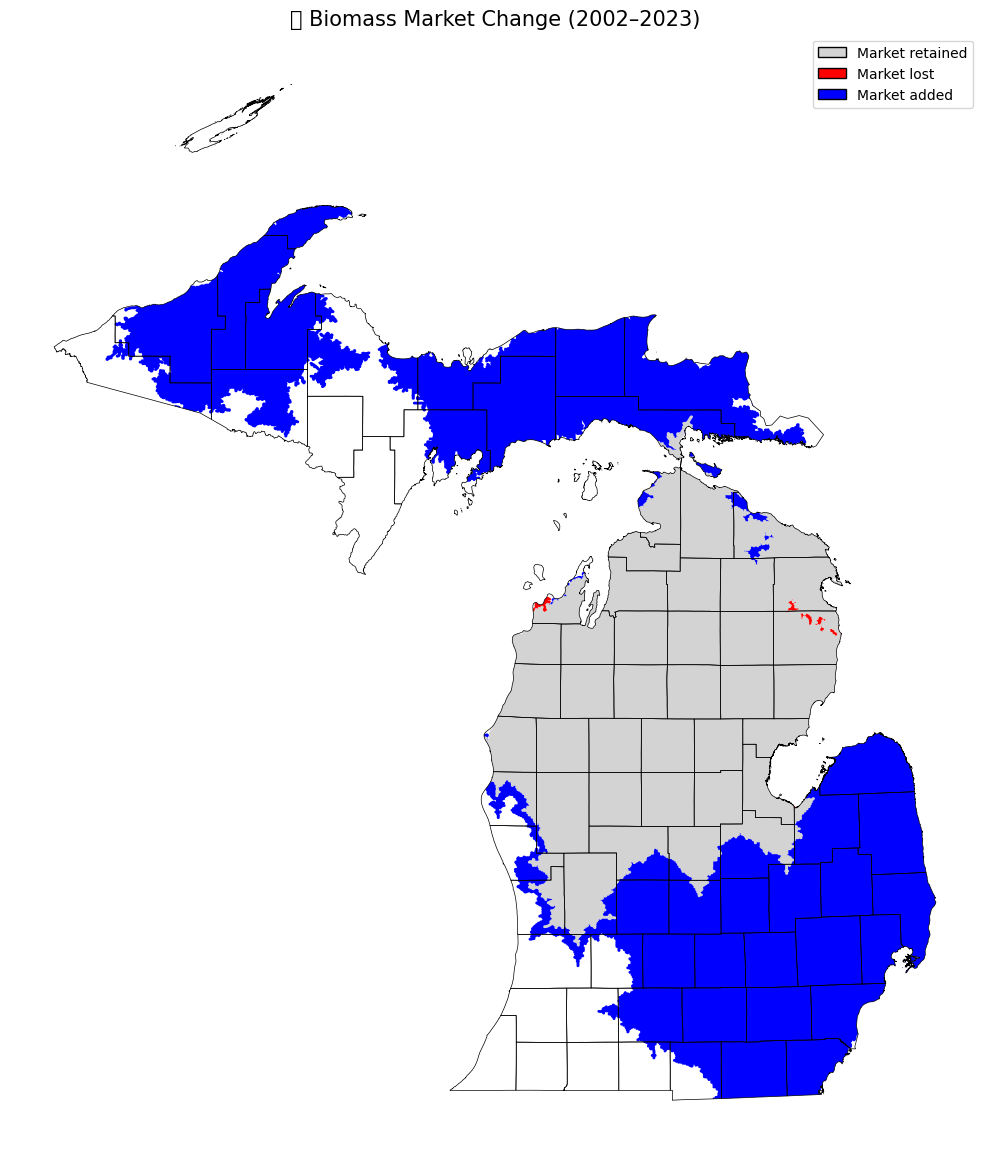

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os

# === File paths ===
michigan_path = shp("michigan_counties.shp")
path_2002 = shp("biomass_2002.shp")
path_2023 = shp("biomass_2023.shp")


# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g02 = gpd.read_file(path_2002)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g02 = g02.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom02 = gpd.overlay(g02.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom02.intersection(geom23)
lost_geom = geom02.difference(geom23)
added_geom = geom23.difference(geom02)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)

retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

# === Legend styling
legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)

# === Title and appearance
ax.set_title("📉 Biomass Market Change (2002–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()


/tmp/ipython-input-12-2179707777.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-12-2179707777.py:27: UserWarning: `keep_geom_type=True` in overlay resulted in 90 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-12-2179707777.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-12-2179707777.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-12-2179707777.py:69: Use

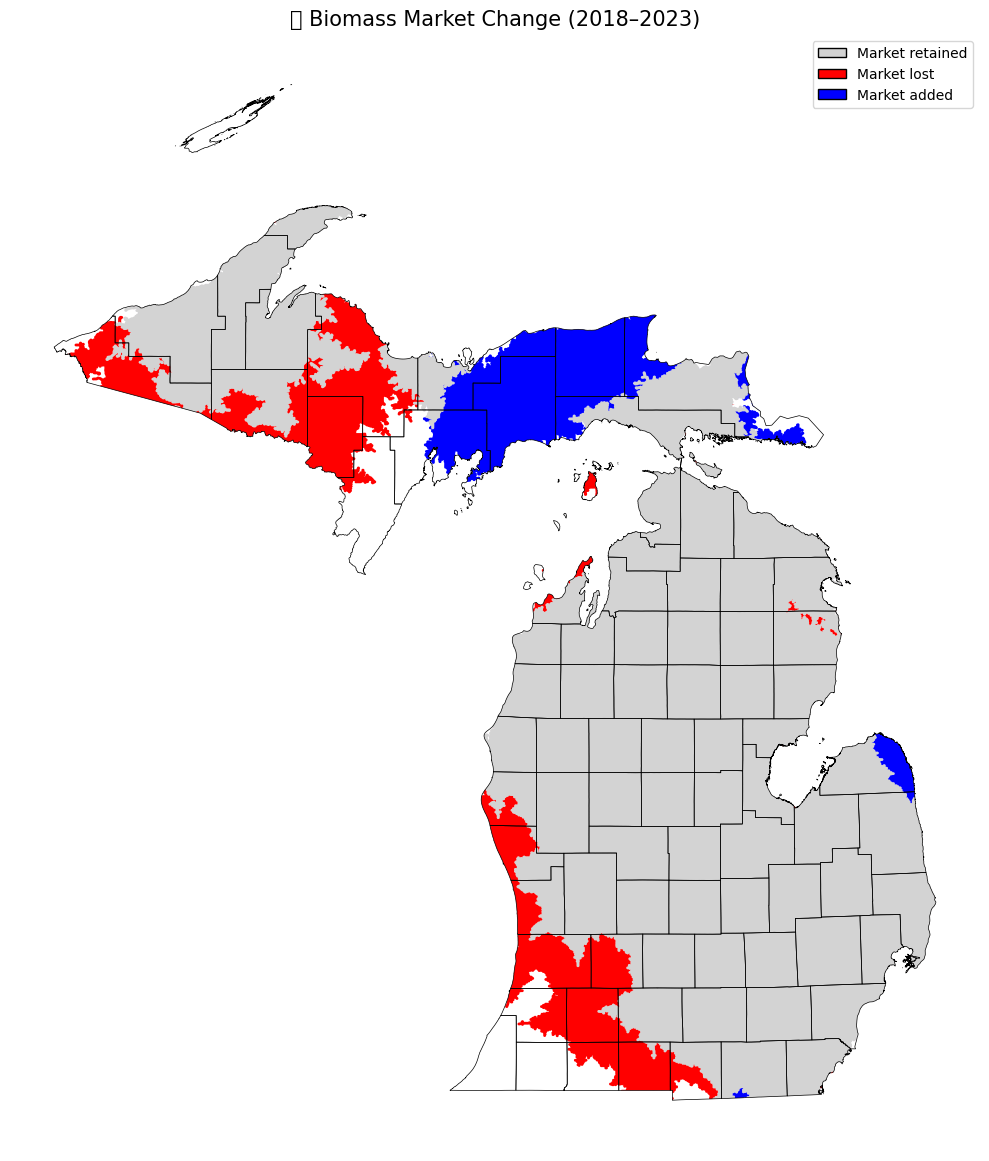

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os

# === File paths ===

michigan_path = shp("michigan_counties.shp")
path_2018 = shp("biomass_2018.shp")
path_2023 = shp("biomass_2023.shp")


# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g18 = gpd.read_file(path_2018)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g18 = g18.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom18.intersection(geom23)
lost_geom = geom18.difference(geom23)
added_geom = geom23.difference(geom18)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)

retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

# === Legend styling
legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)

# === Title and appearance
ax.set_title("📉 Biomass Market Change (2018–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()


# Hardwood Sawlogs

/tmp/ipython-input-13-3139930051.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-13-3139930051.py:27: UserWarning: `keep_geom_type=True` in overlay resulted in 146 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom85 = gpd.overlay(g85.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-13-3139930051.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom85 = gpd.overlay(g85.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-13-3139930051.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-13-3139930051.py:65: Us

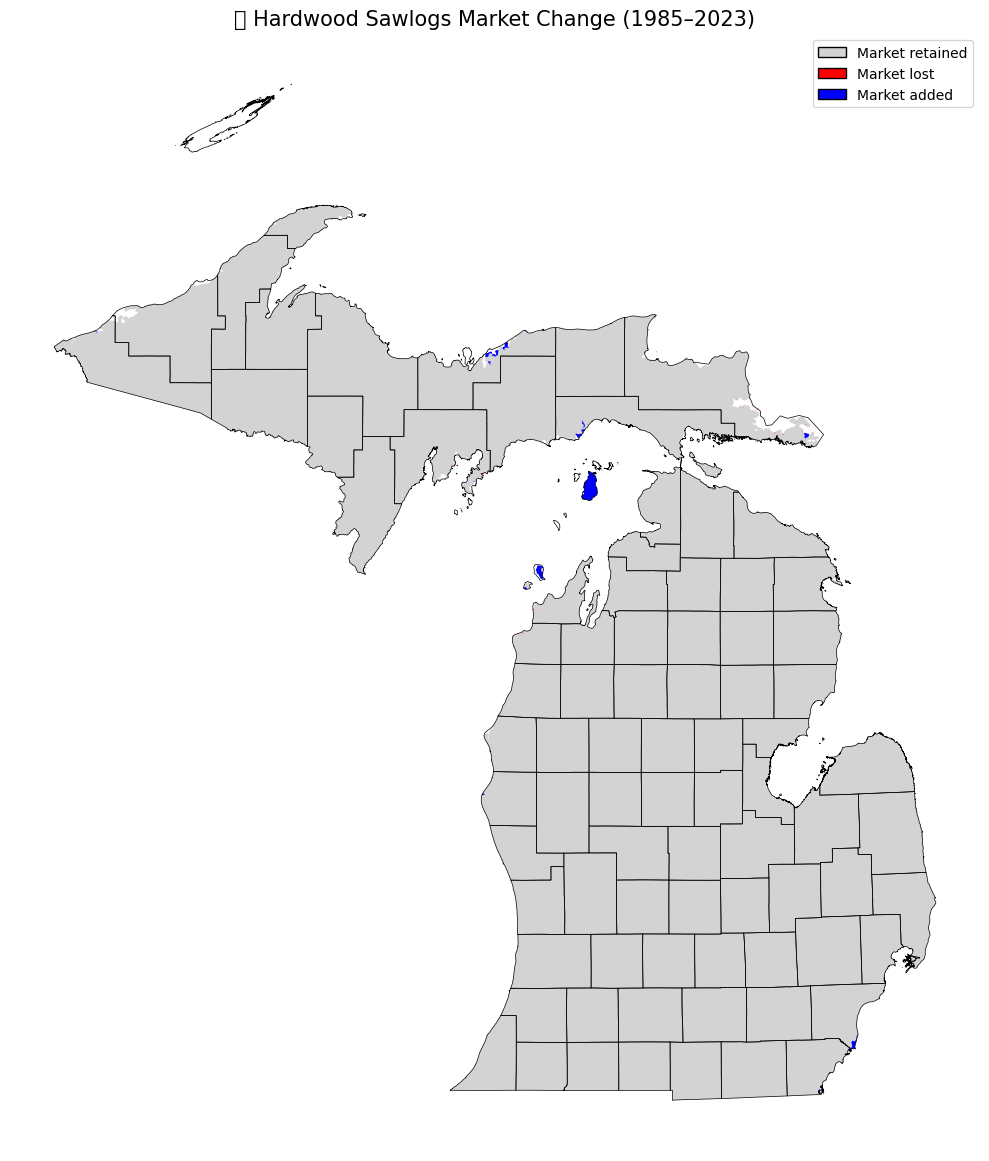

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
michigan_path = shp("michigan_counties.shp")
path_1985 = shp("hardwood_1985.shp")
path_2023 = shp("hardwood_2023.shp")


# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g85 = gpd.read_file(path_1985)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g85 = g85.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom85 = gpd.overlay(g85.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom85.intersection(geom23)
lost_geom = geom85.difference(geom23)
added_geom = geom23.difference(geom85)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Hardwood Sawlogs Market Change (1985–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()



/tmp/ipython-input-14-2764575485.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-14-2764575485.py:27: UserWarning: `keep_geom_type=True` in overlay resulted in 94 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom94 = gpd.overlay(g94.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-14-2764575485.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom94 = gpd.overlay(g94.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-14-2764575485.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-14-2764575485.py:65: Use

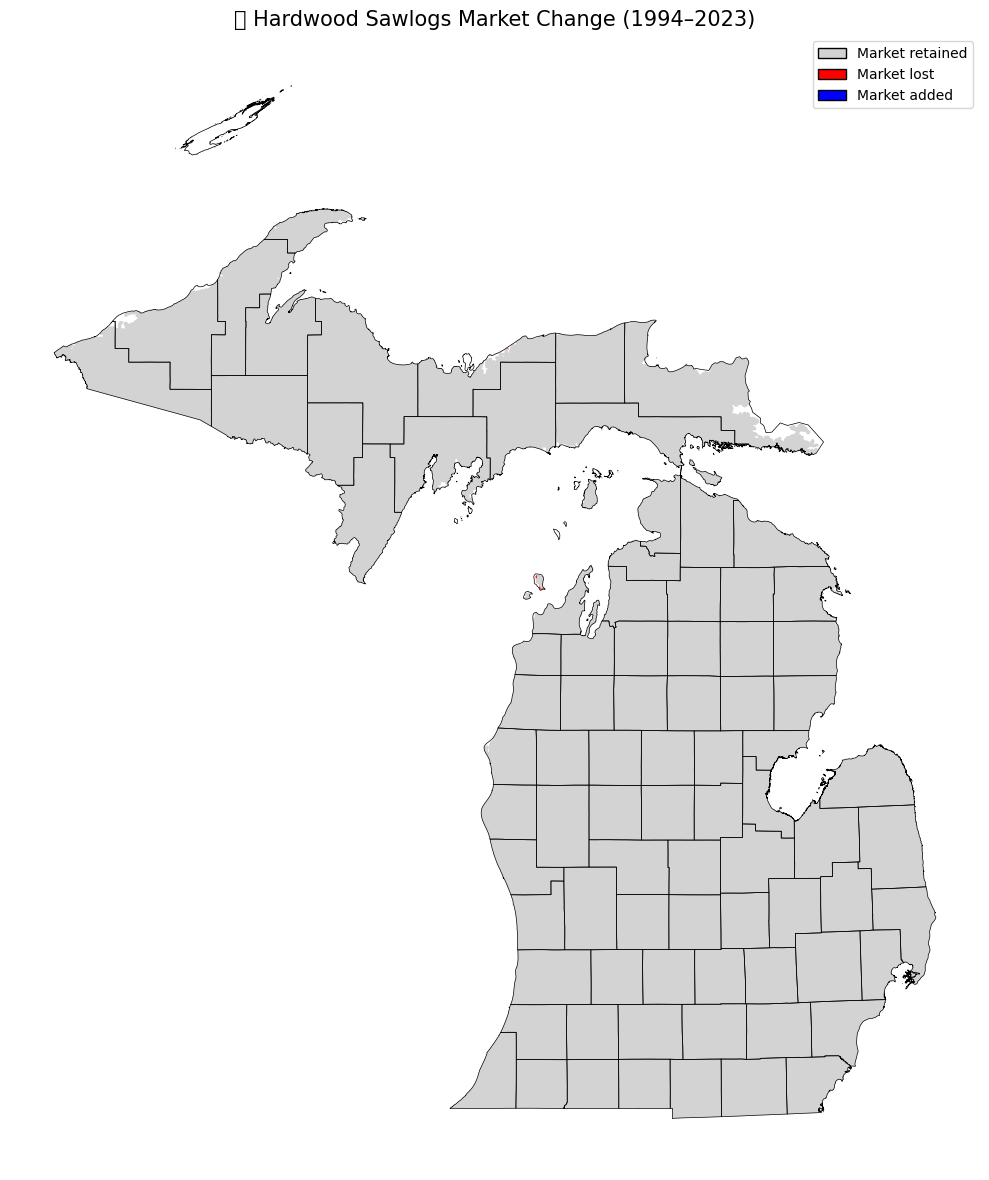

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
michigan_path = shp("michigan_counties.shp")
path_1994 = shp("hardwood_1994.shp")
path_2023 = shp("hardwood_2023.shp")


# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g94 = gpd.read_file(path_1994)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g94 = g94.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom94 = gpd.overlay(g94.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom94.intersection(geom23)
lost_geom = geom94.difference(geom23)
added_geom = geom23.difference(geom94)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Hardwood Sawlogs Market Change (1994–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()



/tmp/ipython-input-15-2949878647.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-15-2949878647.py:27: UserWarning: `keep_geom_type=True` in overlay resulted in 144 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom02 = gpd.overlay(g02.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-15-2949878647.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom02 = gpd.overlay(g02.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-15-2949878647.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-15-2949878647.py:65: Us

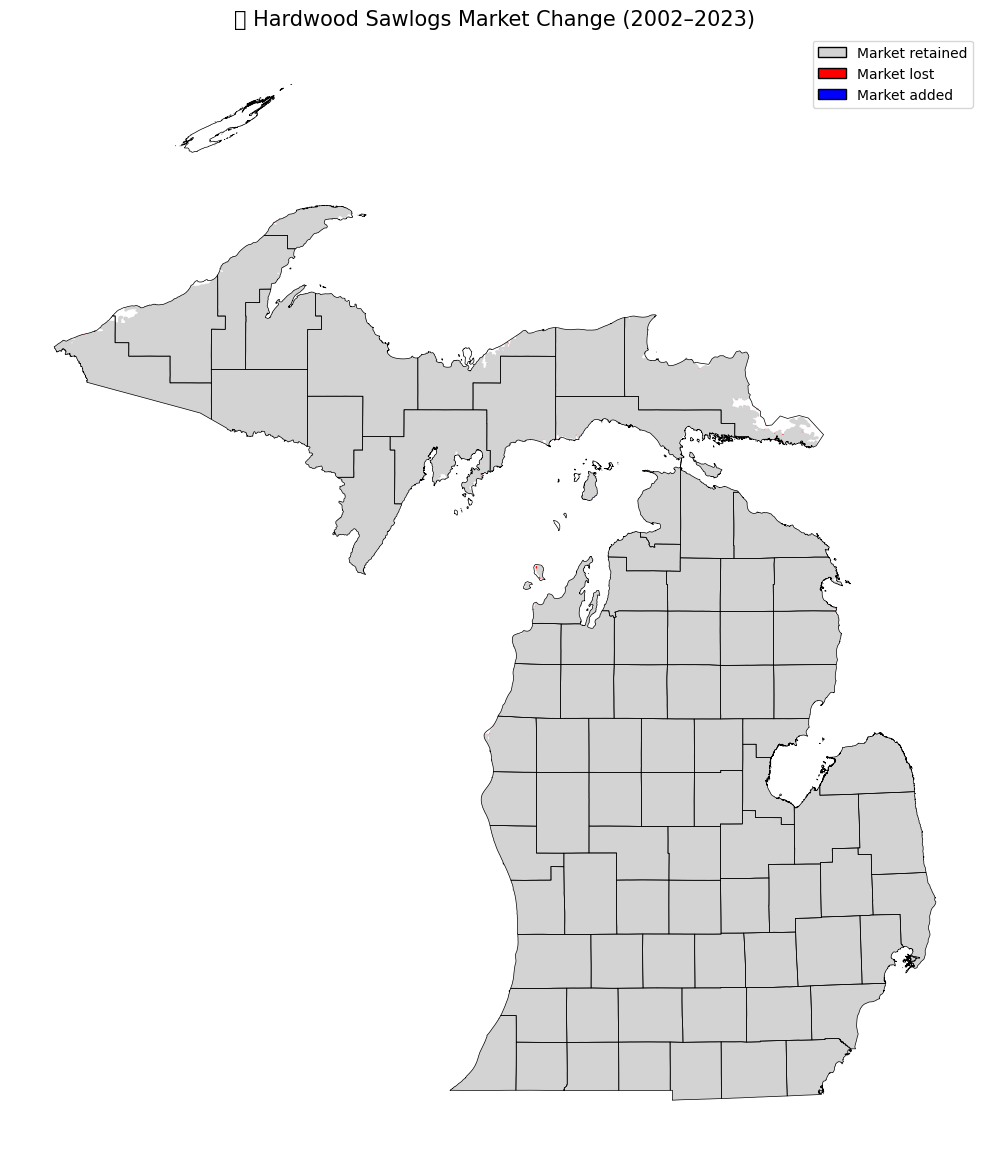

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
michigan_path = shp("michigan_counties.shp")
path_2002 = shp("hardwood_2002.shp")
path_2023 = shp("hardwood_2023.shp")


# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g02 = gpd.read_file(path_2002)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g02 = g02.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom02 = gpd.overlay(g02.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom02.intersection(geom23)
lost_geom = geom02.difference(geom23)
added_geom = geom23.difference(geom02)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Hardwood Sawlogs Market Change (2002–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()



/tmp/ipython-input-16-704768486.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-16-704768486.py:27: UserWarning: `keep_geom_type=True` in overlay resulted in 94 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-16-704768486.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-16-704768486.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-16-704768486.py:65: UserWarn

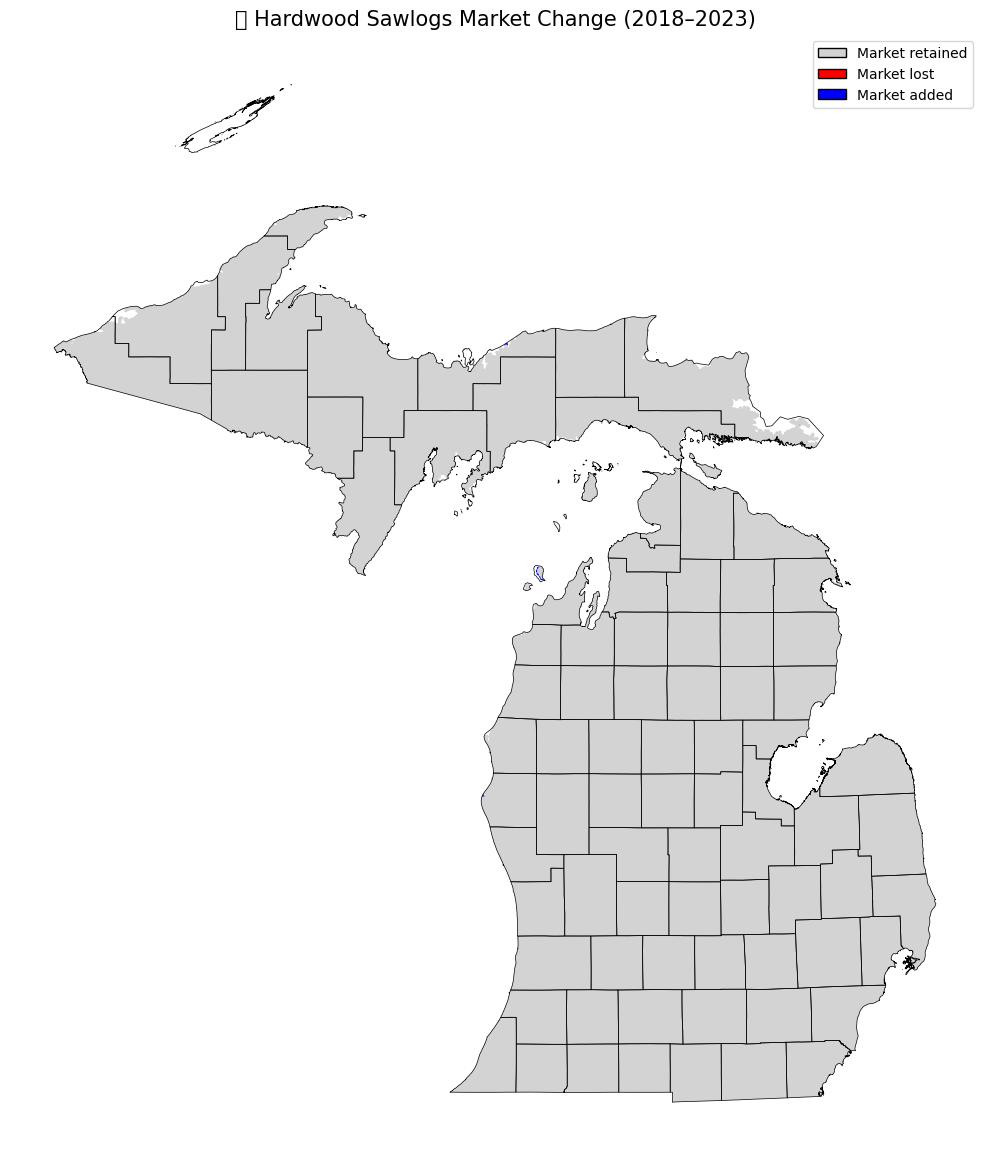

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
michigan_path = shp("michigan_counties.shp")
path_2018 = shp("hardwood_2018.shp")
path_2023 = shp("hardwood_2023.shp")


# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g18 = gpd.read_file(path_2018)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g18 = g18.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom18.intersection(geom23)
lost_geom = geom18.difference(geom23)
added_geom = geom23.difference(geom18)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Hardwood Sawlogs Market Change (2018–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()



# Pulpwood

/tmp/ipython-input-17-4060512063.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-17-4060512063.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom85 = gpd.overlay(g85.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-17-4060512063.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-17-4060512063.py:65: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

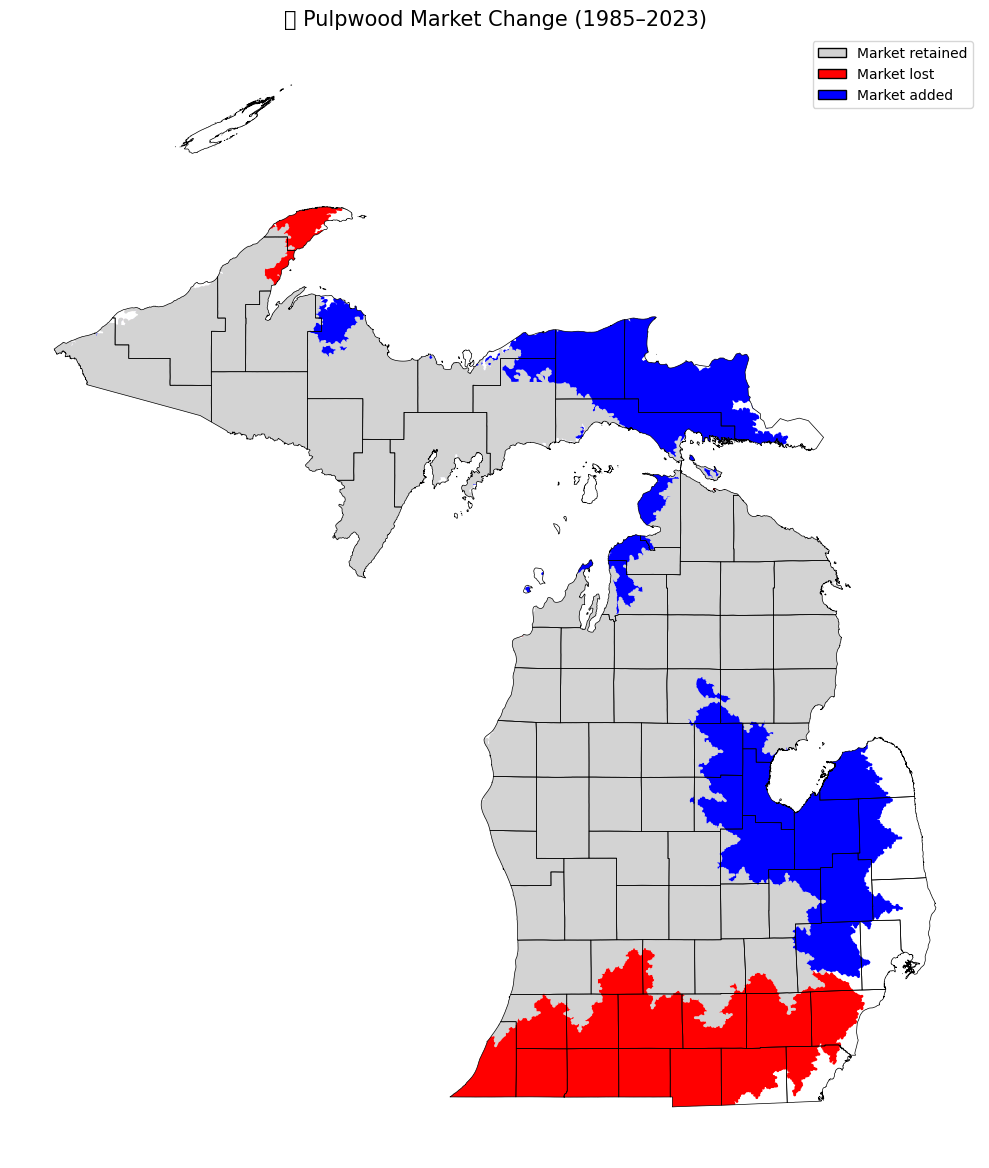

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
michigan_path = shp("michigan_counties.shp")
path_1985 = shp("pulpwood_1985.shp")
path_2023 = shp("pulpwood_2023.shp")


# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g85 = gpd.read_file(path_1985)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g85 = g85.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom85 = gpd.overlay(g85.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Market change analysis
retained_geom = geom85.intersection(geom23)
lost_geom = geom85.difference(geom23)
added_geom = geom23.difference(geom85)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Pulpwood Market Change (1985–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()



/tmp/ipython-input-18-1876026013.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-18-1876026013.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom94 = gpd.overlay(g94.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-18-1876026013.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-18-1876026013.py:65: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

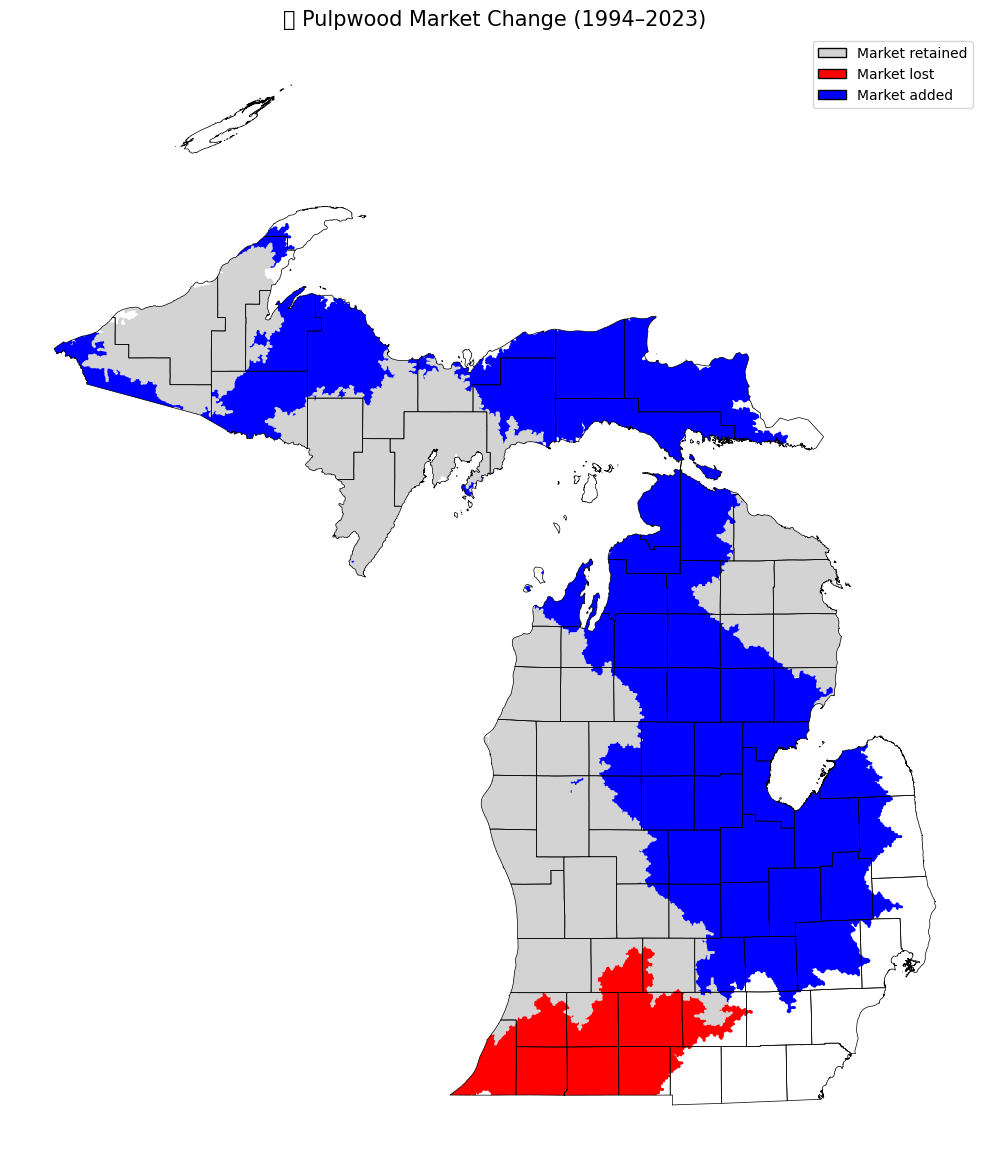

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
michigan_path = shp("michigan_counties.shp")
path_1994 = shp("pulpwood_1994.shp")
path_2023 = shp("pulpwood_2023.shp")


# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g94 = gpd.read_file(path_1994)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g94 = g94.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom94 = gpd.overlay(g94.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom94.intersection(geom23)
lost_geom = geom94.difference(geom23)
added_geom = geom23.difference(geom94)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Pulpwood Market Change (1994–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()



/tmp/ipython-input-19-4038783305.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-19-4038783305.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom02 = gpd.overlay(g02.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-19-4038783305.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-19-4038783305.py:65: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

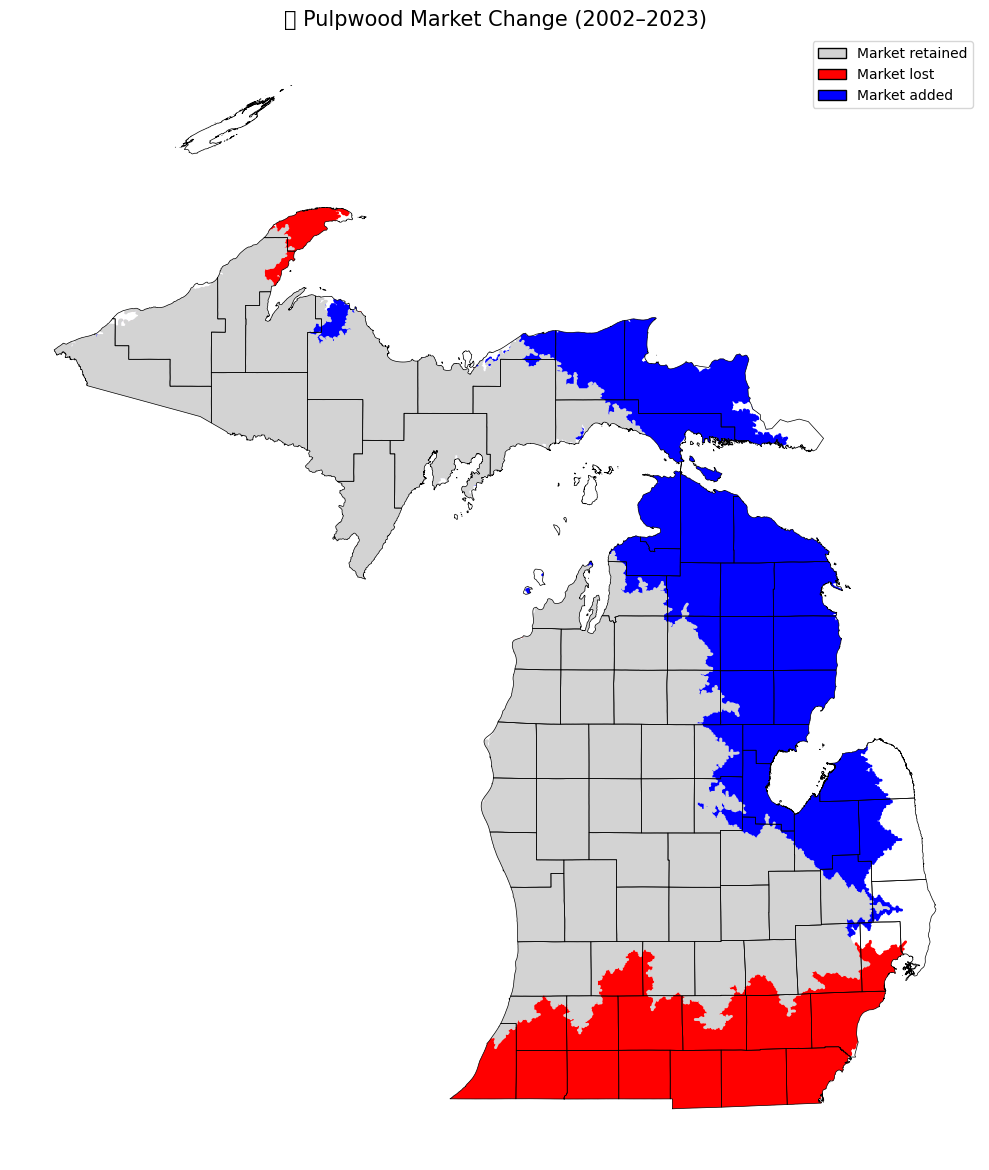

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
michigan_path = shp("michigan_counties.shp")
path_2002 = shp("pulpwood_2002.shp")
path_2023 = shp("pulpwood_2023.shp")


# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g02 = gpd.read_file(path_2002)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g02 = g02.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom02 = gpd.overlay(g02.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Market change geometries
retained_geom = geom02.intersection(geom23)
lost_geom = geom02.difference(geom23)
added_geom = geom23.difference(geom02)

# === Wrap into GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to MI
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Pulpwood Market Change (2002–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()



/tmp/ipython-input-20-3368299799.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-20-3368299799.py:27: UserWarning: `keep_geom_type=True` in overlay resulted in 30 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-20-3368299799.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-20-3368299799.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-20-3368299799.py:65: Use

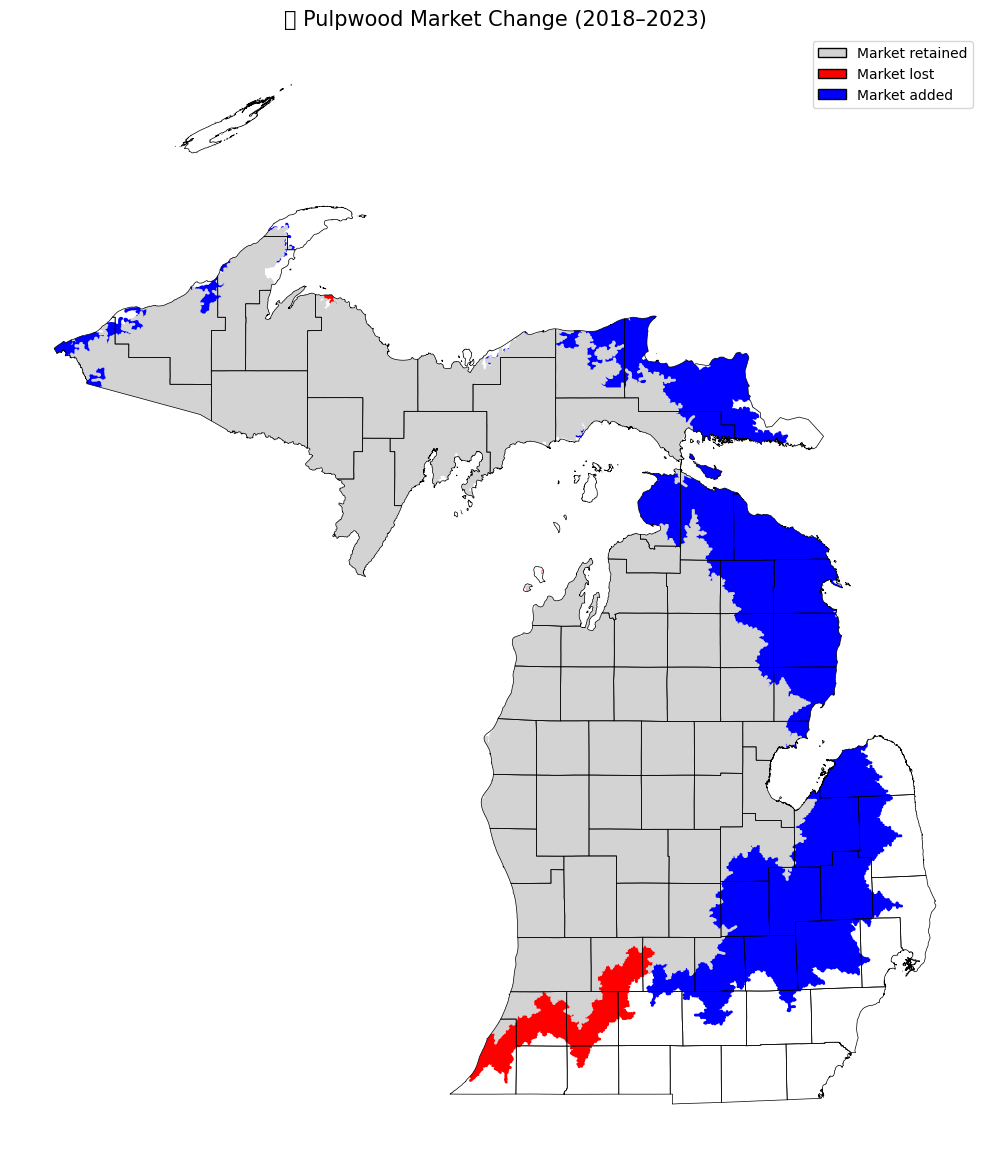

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
michigan_path = shp("michigan_counties.shp")
path_2018 = shp("pulpwood_2018.shp")
path_2023 = shp("pulpwood_2023.shp")


# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g18 = gpd.read_file(path_2018)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g18 = g18.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market area to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Calculate market change geometries
retained_geom = geom18.intersection(geom23)
lost_geom = geom18.difference(geom23)
added_geom = geom23.difference(geom18)

# === Wrap into GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Clip to Michigan
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Pulpwood Market Change (2018–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()



# Softwood

/tmp/ipython-input-21-2575266105.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-21-2575266105.py:27: UserWarning: `keep_geom_type=True` in overlay resulted in 136 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom85 = gpd.overlay(g85.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-21-2575266105.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom85 = gpd.overlay(g85.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-21-2575266105.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-21-2575266105.py:65: Us

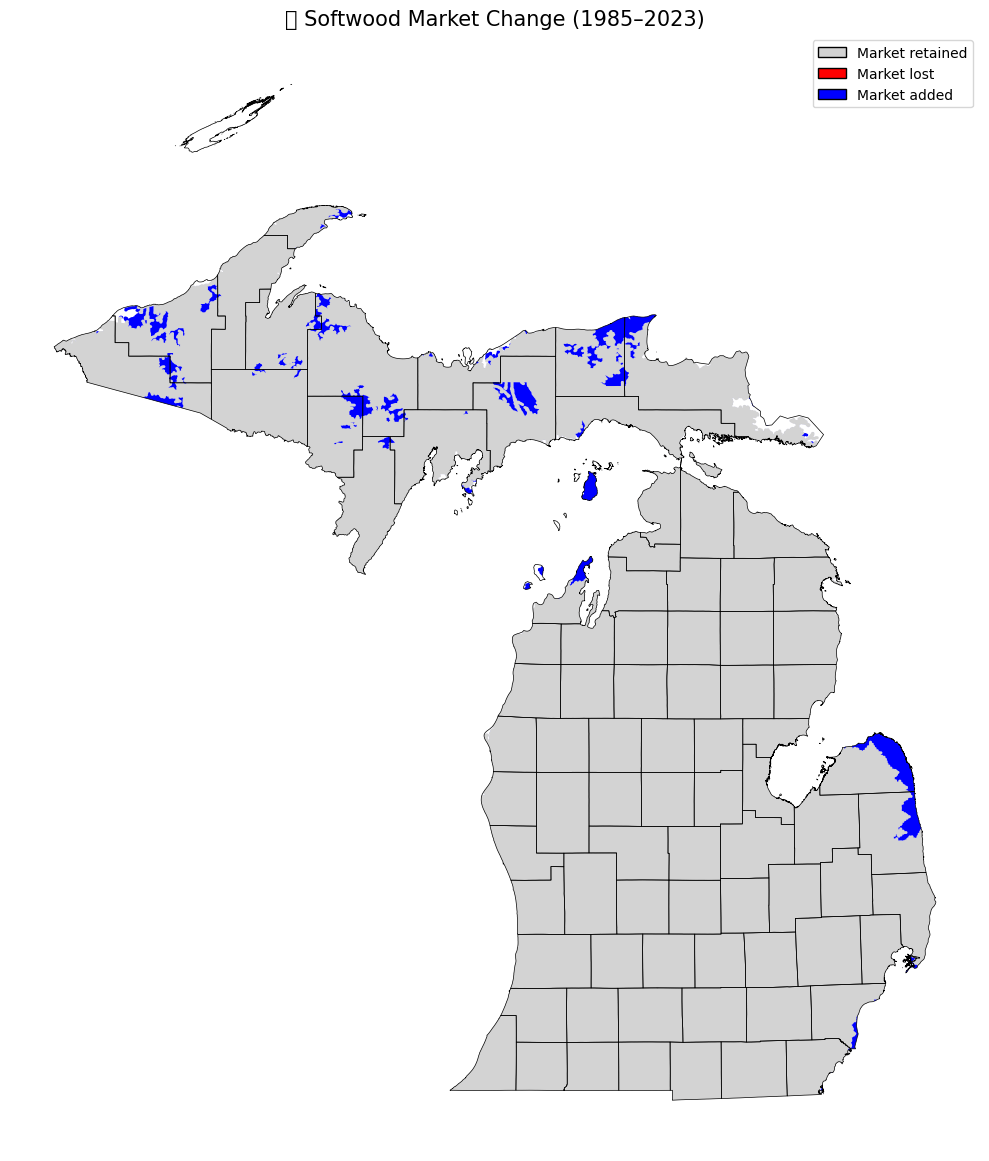

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
michigan_path = shp("michigan_counties.shp")
path_1985 = shp("softwood_1985.shp")
path_2023 = shp("softwood_2023.shp")


# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g85 = gpd.read_file(path_1985)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g85 = g85.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market area to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom85 = gpd.overlay(g85.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Calculate market change geometries
retained_geom = geom85.intersection(geom23)
lost_geom = geom85.difference(geom23)
added_geom = geom23.difference(geom85)

# === Wrap into GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Softwood Market Change (1985–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()



/tmp/ipython-input-22-2984993327.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-22-2984993327.py:27: UserWarning: `keep_geom_type=True` in overlay resulted in 140 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom94 = gpd.overlay(g94.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-22-2984993327.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom94 = gpd.overlay(g94.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-22-2984993327.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-22-2984993327.py:65: Us

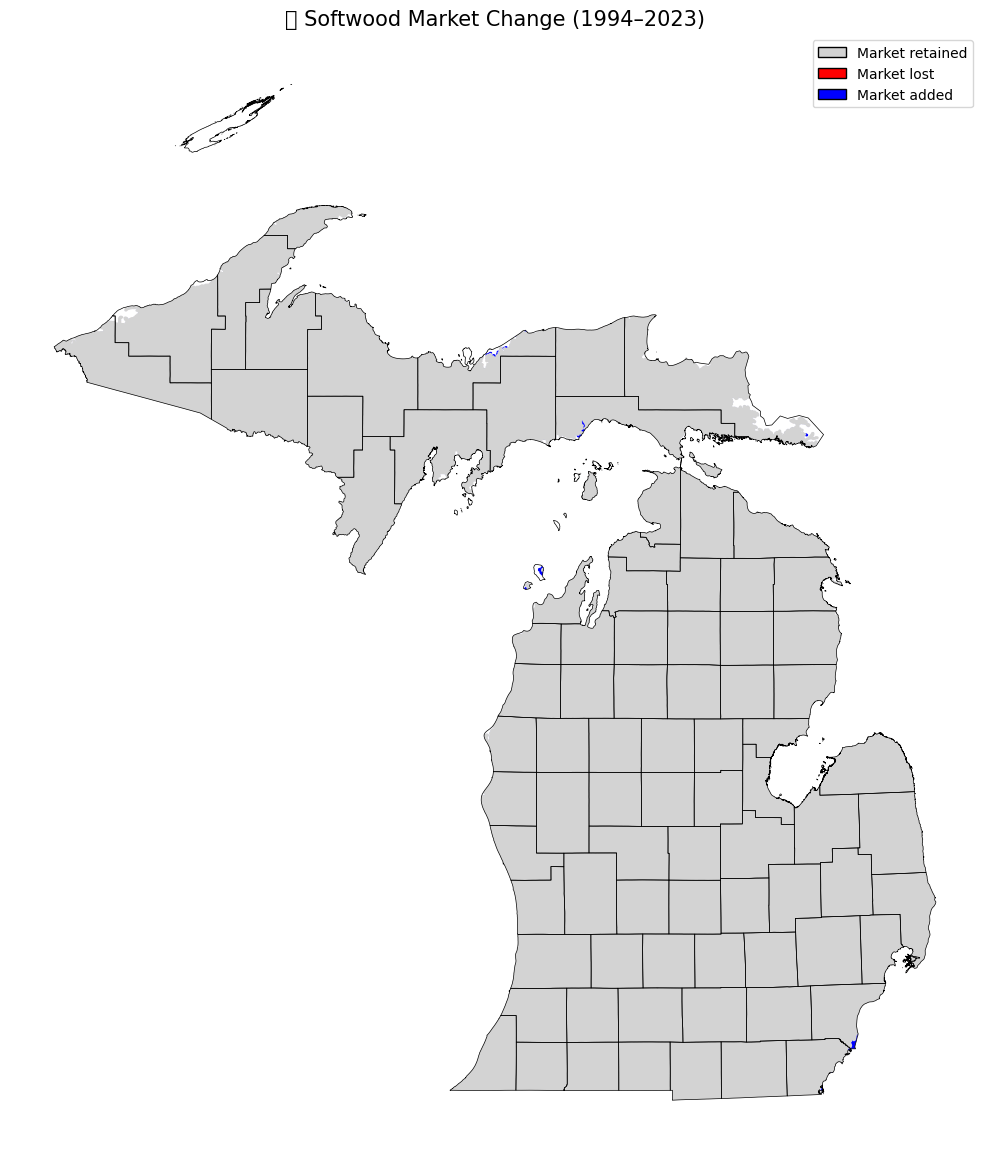

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
michigan_path = shp("michigan_counties.shp")
path_1994 = shp("softwood_1994.shp")
path_2023 = shp("softwood_2023.shp")


# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g94 = gpd.read_file(path_1994)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g94 = g94.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market area to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom94 = gpd.overlay(g94.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change
retained_geom = geom94.intersection(geom23)
lost_geom = geom94.difference(geom23)
added_geom = geom23.difference(geom94)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Softwood Market Change (1994–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()



/tmp/ipython-input-23-2125094200.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-23-2125094200.py:27: UserWarning: `keep_geom_type=True` in overlay resulted in 94 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom02 = gpd.overlay(g02.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-23-2125094200.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom02 = gpd.overlay(g02.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-23-2125094200.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-23-2125094200.py:65: Use

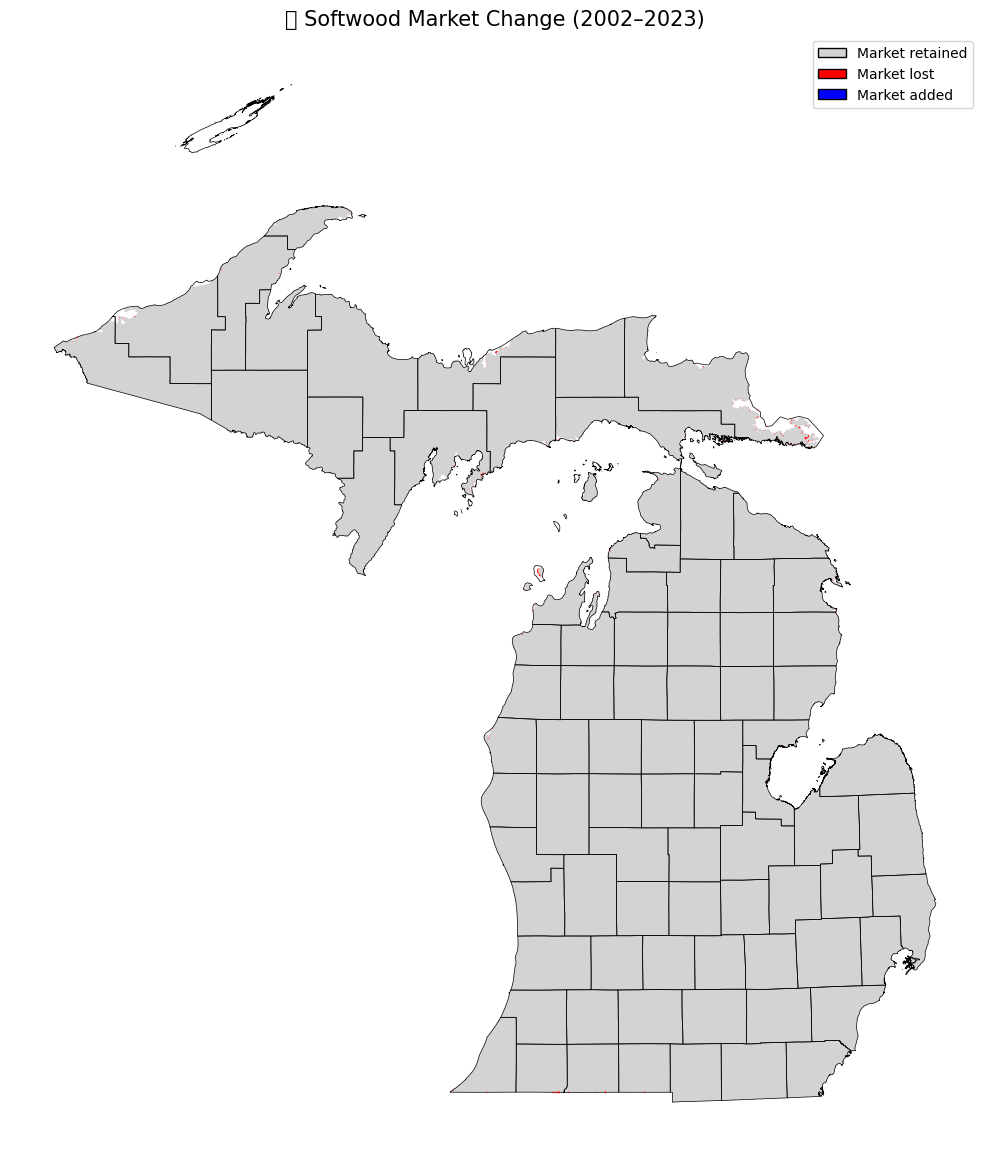

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
michigan_path = shp("michigan_counties.shp")
path_2002 = shp("softwood_2002.shp")
path_2023 = shp("softwood_2023.shp")


# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g02 = gpd.read_file(path_2002)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g02 = g02.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom02 = gpd.overlay(g02.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Market change geometry
retained_geom = geom02.intersection(geom23)
lost_geom = geom02.difference(geom23)
added_geom = geom23.difference(geom02)

# === Wrap in GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Clip to Michigan
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Softwood Market Change (2002–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

# === Save shapefiles helper
def clean_and_save(gdf, filepath):
    gdf_exploded = gdf.explode(index_parts=False)
    gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]
    if not gdf_clean.empty:
        gdf_clean.to_file(filepath)
    else:
        print(f"⚠️ Skipped saving {filepath} (empty or invalid geometries)")



/tmp/ipython-input-24-3940410797.py:25: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mi_union = mi.unary_union.buffer(0)
/tmp/ipython-input-24-3940410797.py:26: UserWarning: `keep_geom_type=True` in overlay resulted in 144 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-24-3940410797.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-24-3940410797.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
/tmp/ipython-input-24-3940410797.py:64: Us

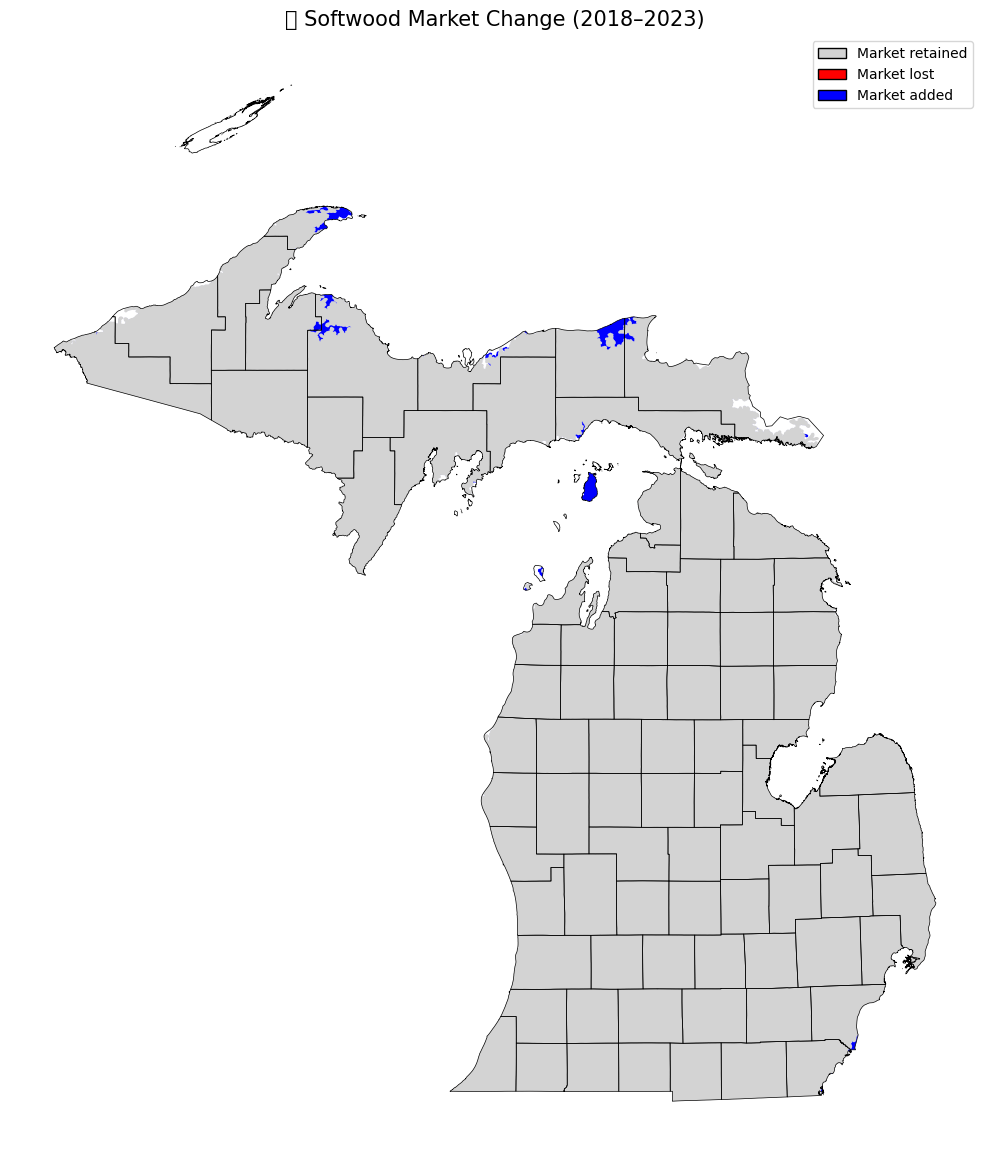

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
michigan_path = shp("michigan_counties.shp")
path_2018 = shp("softwood_2018.shp")
path_2023 = shp("softwood_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g18 = gpd.read_file(path_2018)
g23 = gpd.read_file(path_2023)

# === Reproject to common CRS
target_crs = mi.crs
g18 = g18.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Clip to Michigan
mi_union = mi.unary_union.buffer(0)
geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Market change calculations
retained_geom = geom18.intersection(geom23)
lost_geom = geom18.difference(geom23)
added_geom = geom23.difference(geom18)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Softwood Market Change (2018–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

